In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# dataset 1 (fake_job_posting)
df1 = pd.read_csv('fake_job_postings.csv')

In [24]:
# melihat dataset asli
display(df1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [25]:
print("Dataset terdiri dari 17880 baris dan 18 kolom")
print("Jumlah attribute:", len(df1.count()))
print("Jumlah data tiap column\n")
print(df1.count())

Dataset terdiri dari 17880 baris dan 18 kolom
Jumlah attribute: 18
Jumlah data tiap column

job_id                 17880
title                  17880
location               17534
department              6333
salary_range            2868
company_profile        14572
description            17879
requirements           15185
benefits               10670
telecommuting          17880
has_company_logo       17880
has_questions          17880
employment_type        14409
required_experience    10830
required_education      9775
industry               12977
function               11425
fraudulent             17880
dtype: int64


In [26]:
print("Jumlah data tak valid\n")
print(df1.isnull().sum())

Jumlah data tak valid

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [27]:
# melihat persentase data tidak valid pada setiap kolom
round(100*(df1.isnull().sum()/len(df1.index)),2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

In [0]:
# karena persentase salary_range terlalu besar, maka bisa kita drop
df1 = df1.drop('salary_range',axis=1)

In [29]:
# Melihat unique value dari tiap kolom yang nantinya akan menjadi 
# didrop kolom yang nilai unique nya terlalu besar
print("Unique value tiap kolom")

for i in df1:
  print(i + " = " + str(df1[i].unique().size))

Unique value tiap kolom
job_id = 17880
title = 11231
location = 3106
department = 1338
company_profile = 1710
description = 14802
requirements = 11969
benefits = 6206
telecommuting = 2
has_company_logo = 2
has_questions = 2
employment_type = 6
required_experience = 8
required_education = 14
industry = 132
function = 38
fraudulent = 2


In [0]:
# karena persentase beberapa data diatas invalid, maka bisa kita drop
df1 = df1.drop('title',axis=1)
df1 = df1.drop('location',axis=1)
df1 = df1.drop('department',axis=1)
df1 = df1.drop('company_profile',axis=1)
df1 = df1.drop('description',axis=1)
df1 = df1.drop('requirements',axis=1)
df1 = df1.drop('benefits',axis=1)

In [0]:
# mengisi NA values pada kolom yang unique valuenya sedikit dengan 'Other'
# sisanya kita lakukan drop bari (data)

df1['employment_type'] = df1['employment_type'].fillna(value='Other')
df1['required_experience'] = df1['required_experience'].fillna(value='Other')
df1['required_education'] = df1['required_education'].fillna(value='Other')
df1['industry'] = df1['industry'].fillna(value='Other')
df1['function'] = df1['function'].fillna(value='Other')

In [32]:
print("Jumlah attribute:", len(df1.count()))
print("Jumlah data tiap column\n")
print(df1.count())

Jumlah attribute: 10
Jumlah data tiap column

job_id                 17880
telecommuting          17880
has_company_logo       17880
has_questions          17880
employment_type        17880
required_experience    17880
required_education     17880
industry               17880
function               17880
fraudulent             17880
dtype: int64


In [33]:
# sisa kolom yang dipakai untuk perhitungan
df1.columns

Index(['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

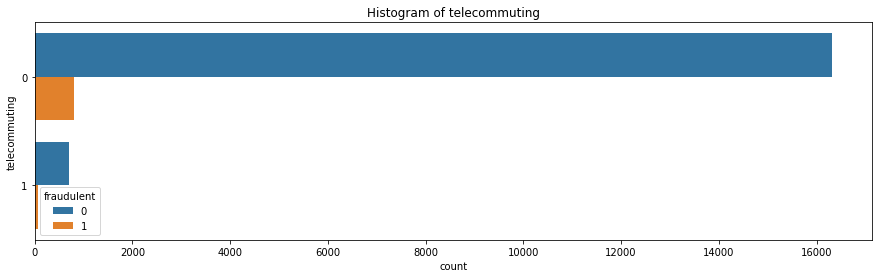

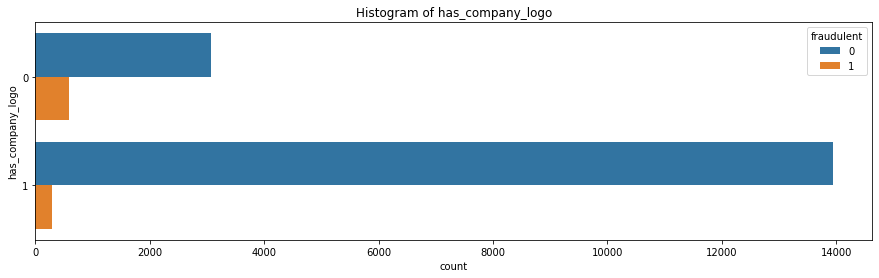

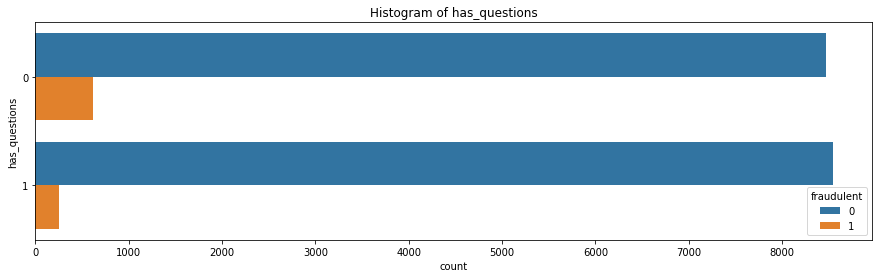

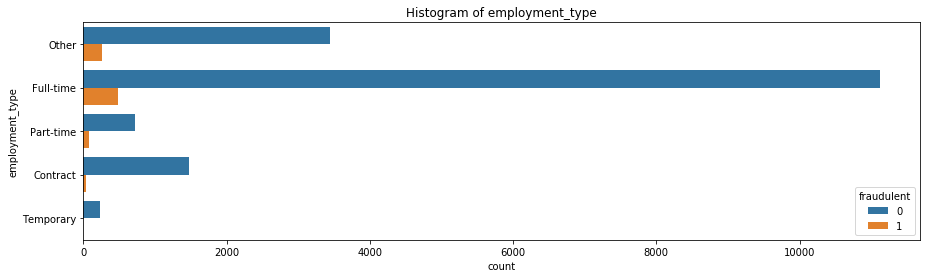

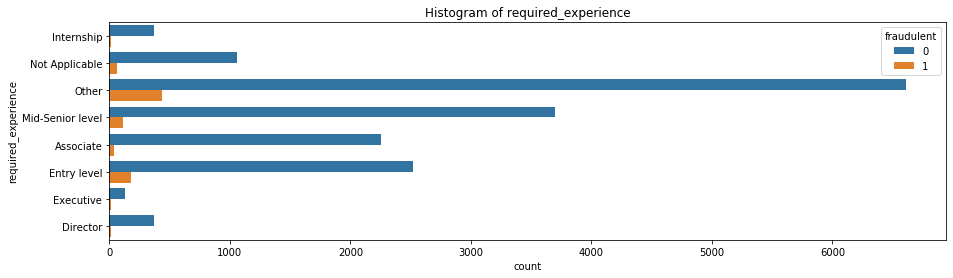

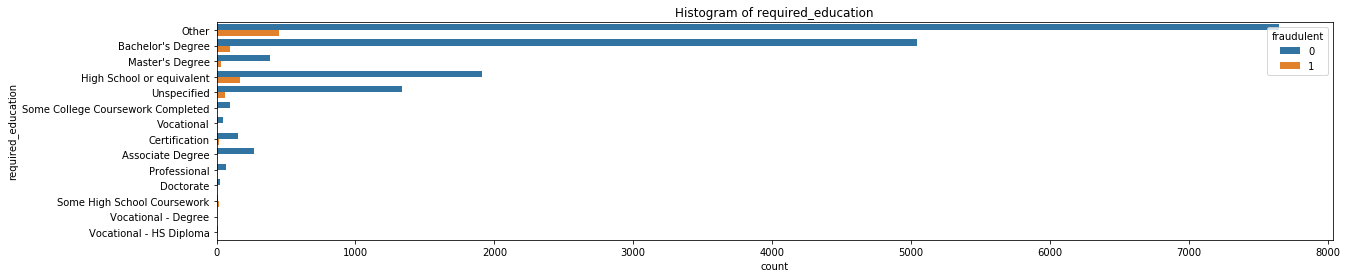

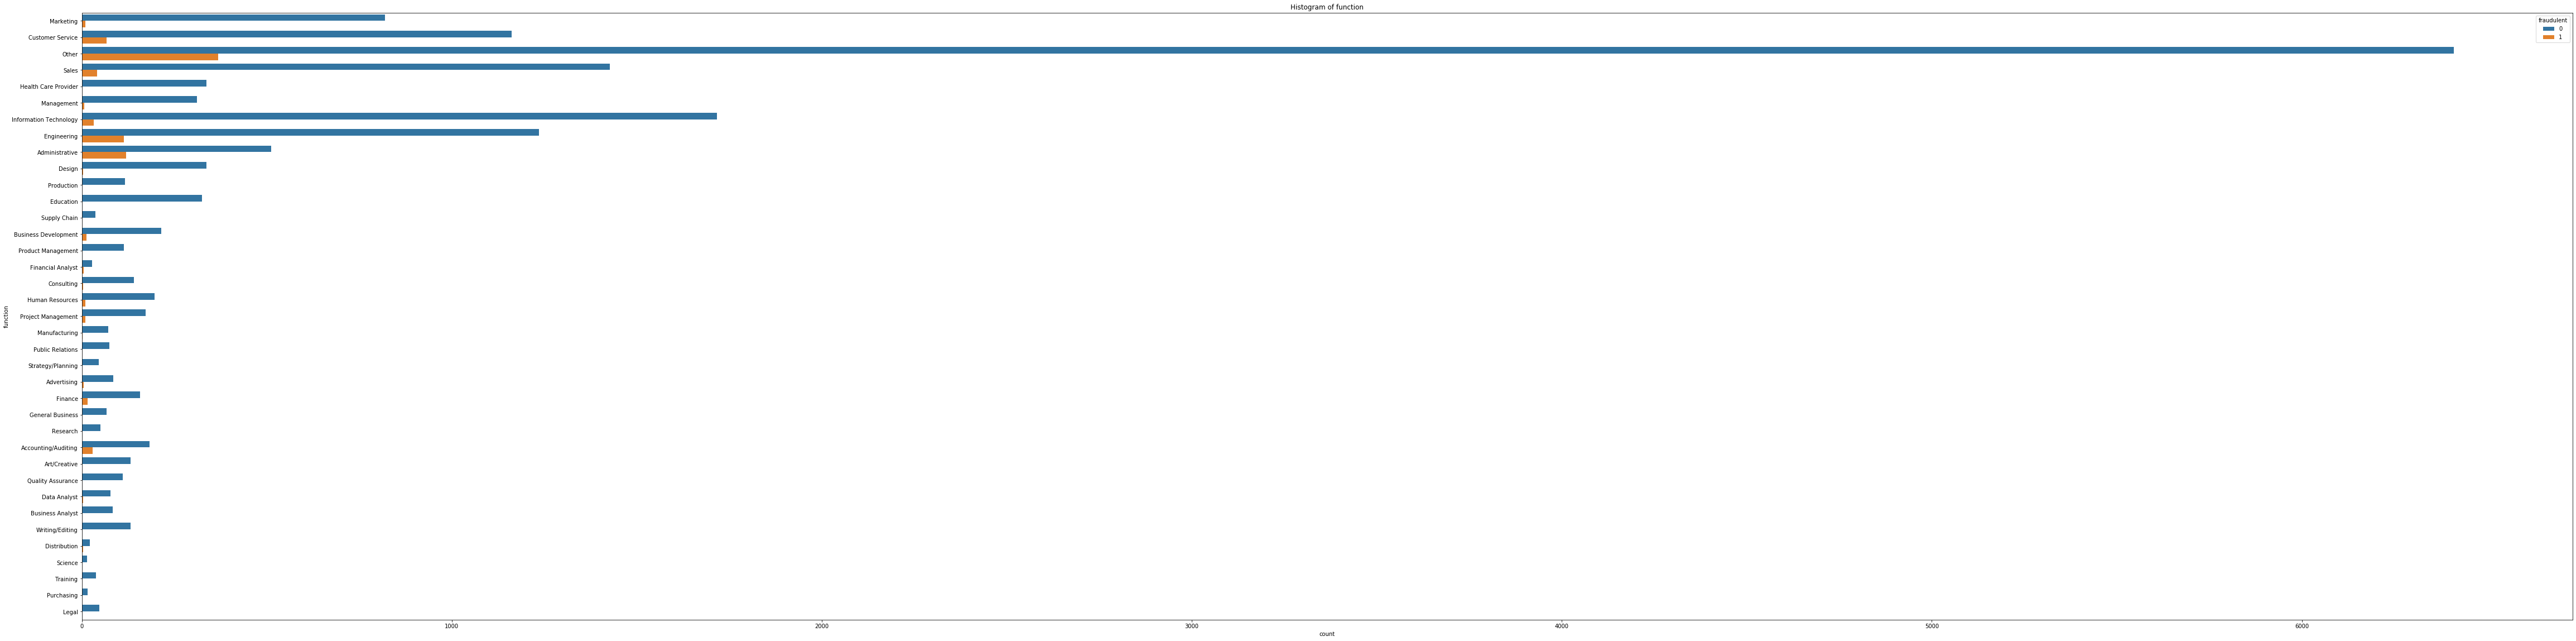

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(hue='fraudulent',y='telecommuting',data=df1)
plt.title('Histogram of telecommuting')
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(hue='fraudulent',y='has_company_logo',data=df1)
plt.title('Histogram of has_company_logo')
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(hue='fraudulent',y='has_questions',data=df1)
plt.title('Histogram of has_questions')
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(hue='fraudulent',y='employment_type',data=df1)
plt.title('Histogram of employment_type')
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(hue='fraudulent',y='required_experience',data=df1)
plt.title('Histogram of required_experience')
plt.show()

plt.figure(figsize=(20,4))
sns.countplot(hue='fraudulent',y='required_education',data=df1)
plt.title('Histogram of required_education')
plt.show()

plt.figure(figsize=(80,20))
sns.countplot(hue='fraudulent',y='function',data=df1)
plt.title('Histogram of function')
plt.show()

In [35]:
# Menampilkan covariance (hubungan) tiap kolom 
df1.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


In [0]:
string_val_col = ["employment_type", "required_experience", "required_education", "function", "industry"]
for i in string_val_col:
    encoded = pd.get_dummies(df1[i])
    df1 = pd.concat([df1, encoded], axis=1)
    df1 = df1.drop(i, axis = 1)

In [37]:
display(df1)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Associate,Director,Entry level,Executive,Internship,Mid-Senior level,Not Applicable,Other,Associate Degree,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Other,Professional,Some College Coursework Completed,Some High School Coursework,Unspecified,Vocational,Vocational - Degree,Vocational - HS Diploma,Accounting/Auditing,Administrative,Advertising,Art/Creative,Business Analyst,Business Development,Consulting,Customer Service,...,Package/Freight Delivery,Packaging and Containers,Performing Arts,Pharmaceuticals,Philanthropy,Photography,Plastics,Primary/Secondary Education,Printing,Professional Training & Coaching,Program Development,Public Policy,Public Relations and Communications,Public Safety,Publishing,Ranching,Real Estate,Religious Institutions,Renewables & Environment,Research,Restaurants,Retail,Security and Investigations,Semiconductors,Shipbuilding,Sporting Goods,Sports,Staffing and Recruiting,Telecommunications,Textiles,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17876,17877,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17877,17878,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17878,17879,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
kelas = "fraudulent"
data = [f for f in df1.columns if f not in ["job_id", kelas]]

X = df1[data]
y = df1[kelas]

In [39]:
# menampilkan data (X)
X

,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Other,Other,Other,Other,Part-time,Temporary,Associate,Director,Entry level,Executive,Internship,Mid-Senior level,Not Applicable,Other,Other,Other,Other,Other,Associate Degree,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Other,Other,Other,Other,Other,Professional,Some College Coursework Completed,Some High School Coursework,Unspecified,Vocational,...,Packaging and Containers,Performing Arts,Pharmaceuticals,Philanthropy,Photography,Plastics,Primary/Secondary Education,Printing,Professional Training & Coaching,Program Development,Public Policy,Public Relations and Communications,Public Safety,Publishing,Ranching,Real Estate,Religious Institutions,Renewables & Environment,Research,Research,Restaurants,Retail,Security and Investigations,Semiconductors,Shipbuilding,Sporting Goods,Sports,Staffing and Recruiting,Telecommunications,Textiles,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17876,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17878,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# menampilkan class (Y)
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [42]:
# cek jumlah tiap value pada class
y.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)

In [70]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
gaussian.score(X_test,Y_test)

0.30145413870246085

In [74]:
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43      6800
           1       0.07      0.99      0.12       352

    accuracy                           0.31      7152
   macro avg       0.53      0.63      0.28      7152
weighted avg       0.95      0.31      0.42      7152



In [75]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB(binarize=0.0)
bernoulli.fit(X_train, Y_train)
bernoulli.score(X_test, Y_test)

0.7718120805369127

In [76]:
prediction = bernoulli.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      6800
           1       0.10      0.47      0.17       352

    accuracy                           0.77      7152
   macro avg       0.53      0.63      0.52      7152
weighted avg       0.92      0.77      0.83      7152



In [77]:
from sklearn.naive_bayes import MultinomialNB

multinomial = MultinomialNB()
multinomial.fit(X_train, Y_train)
multinomial.score(X_test, Y_test)

0.9391778523489933

In [79]:
prediction = multinomial.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6800
           1       0.35      0.27      0.30       352

    accuracy                           0.94      7152
   macro avg       0.66      0.62      0.64      7152
weighted avg       0.93      0.94      0.94      7152



In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
knn.score(X_test, Y_test)

0.9629474272930649

In [87]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,Y_train)
knn.score(X_test, Y_test)

0.9657438478747203

In [88]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
knn.score(X_test, Y_test)

0.9646252796420581

In [89]:
print("Dari hasil knn diatas, terlihat bahwa jumlah neighbors untuk mendapatkan akurasi terbaik adalah 3")

Dari hasil knn diatas, terlihat bahwa jumlah neighbors untuk mendapatkan akurasi terbaik adalah 3


In [0]:
# dataset 2 (patient)
df2 = pd.read_csv('patient.csv')

In [92]:
# melihat dataset asli
display(df2)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,7509,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7509,7510,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7510,7511,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7511,7512,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated


In [93]:
print("Dataset terdiri dari 7513 baris dan 15 kolom")
print("Jumlah attribute:", len(df2.count()))
print("Jumlah data tiap column\n")
print(df2.count())

Jumlah attribute: 15
Jumlah data tiap column

id                  7513
sex                  662
birth_year           649
country             7513
region               421
disease               28
group                 82
infection_reason     144
infection_order       35
infected_by           70
contact_number        50
confirmed_date      7513
released_date         55
deceased_date         36
state               7513
dtype: int64


In [95]:
print("Jumlah data tak valid\n")
print(df2.isnull().sum())

Jumlah data tak valid

id                     0
sex                 6851
birth_year          6864
country                0
region              7092
disease             7485
group               7431
infection_reason    7369
infection_order     7478
infected_by         7443
contact_number      7463
confirmed_date         0
released_date       7458
deceased_date       7477
state                  0
dtype: int64


In [96]:
# melihat persentase data tidak valid pada setiap kolom
round(100*(df2.isnull().sum()/len(df2.index)),2)

id                   0.00
sex                 91.19
birth_year          91.36
country              0.00
region              94.40
disease             99.63
group               98.91
infection_reason    98.08
infection_order     99.53
infected_by         99.07
contact_number      99.33
confirmed_date       0.00
released_date       99.27
deceased_date       99.52
state                0.00
dtype: float64

In [97]:
for i in df2:
  print(i + " = " + str(df2[i].unique().size))

id = 7513
sex = 3
birth_year = 81
country = 3
region = 15
disease = 2
group = 6
infection_reason = 13
infection_order = 7
infected_by = 42
contact_number = 36
confirmed_date = 35
released_date = 21
deceased_date = 17
state = 3
